## Weather Visualizations

The below takes the weather scraping data that I've collected and does analysis on the forecast vs. actual weather history. First analyses:

- Actual vs. forecasting high/low temp: how close are the forecast highs / lows to actuals, and how does this change for a given forecast day (i.e., does the forecast gets worse the further out you are ... probably!)
- Precipitation probability vs. actual precipitation: when the forecast calls for <20% chance of rain, how often does it actual rain?

In [71]:
import pandas as pd
import numpy as np
import math
import datetime as dt
from datetime import datetime
import streamlit
import matplotlib.pyplot as plt

# Set style
plt.style.use('seaborn')

## Functions

In [88]:
def temp_diff(forecast_day, dates=date_list, df=weather_hist):
    
    '''
    Returns the average high and average low difference between the actual temperature and the forecasted temp
    Inputs:
        - forecast_day: int between 0 and 12. This represents number of forecast days out from current actuals
        - dates: list of dates
        - df: dataframe of weather history
    Returns:
        - high_diff: average difference in high temperature between actual temp and forecast temp
        - low_diff: average difference in low temperature between actual temp and forecast temp
    '''
    
    
    combined_high = []
    combined_low = []
    
    for date in dates:
        temp = df[df['forecast_date'] == date].reset_index(drop=True)
        
        try:
            forecast = temp.iloc[forecast_day]
    
            combined_high.append(tuple((forecast['high_temp'], forecast['actual_high'])))
            combined_low.append(tuple((forecast['low_temp'], forecast['actual_low'])))
    
            high_diff = np.mean([abs(day[0] - day[1]) for day in combined_high if math.isnan(day[1]) == False])
            low_diff = np.mean([abs(day[0] - day[1]) for day in combined_low if math.isnan(day[1]) == False])
        except IndexError:
            continue
        
    return high_diff, low_diff

In [96]:
# Create the delta between the day and the forecast_date

def forecast_diff(forecast_date, day):
    return day - forecast_date.day

In [112]:
def precip_compare(i, precip_bucket, df=weather_hist):
    temp = weather_hist[(weather_hist['day_diff'] == i) & (weather_hist['precip_buckets'] == precip_bucket)]
    
    ratio = temp[temp['actual_precip'] == 0].shape[0] / test.shape[0]
    
    return ratio

## Analyses

In [2]:
# Read in weather history

weather_hist = pd.read_csv('./Data/nyc_forecast.csv').drop('Unnamed: 0', axis=1)

In [27]:
# Convert forecast date column to datetime object

weather_hist['forecast_date'] = pd.to_datetime(weather_hist['forecast_date'])

In [101]:
# Create day diff for forecast vs. actual day (i.e., how far away is forecast from actual)

weather_hist['day_diff'] = weather_hist.apply(lambda row: forecast_diff(row['forecast_date'], row['day']), axis=1)

In [29]:
# Define start data and current date for latest forecast information
start_date = '2021-09-18'
today = dt.date.today().strftime('%Y-%m-%d')

In [31]:
# dt.strptime('str goes here', '%Y-%m-%d')

In [33]:
# Create list of dates in the dataset

date_list = []
date = datetime.strptime(start_date, '%Y-%m-%d').date()

while date <= dt.date.today():
    date_list.append(date.strftime('%Y-%m-%d'))
    
    date += dt.timedelta(1)

In [69]:
# Loop through all forecast days to come up with high and low temp difference

forecast_diffs = []

for i in range(12):
    forecast_diffs.append(tuple((temp_diff(i))))

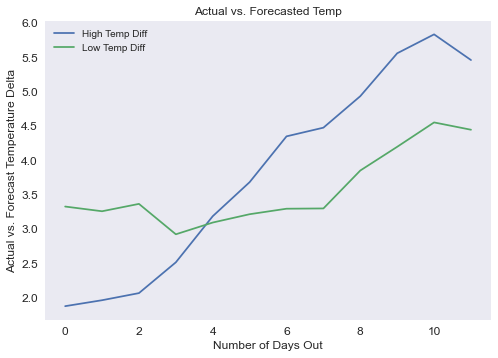

In [81]:
# Plot for difference in temperature between forecast and average by forecast day
# Blue line is high temp, red line is low temp (double check this)

fig, ax = plt.subplots()

x = list(range(12))
y1 = [day[0] for day in forecast_diffs]
y2 = [day[1] for day in forecast_diffs]

ax.plot(x, y1)
ax.plot(x, y2)
ax.grid(False)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

ax.set_ylabel('Actual vs. Forecast Temperature Delta', fontsize=12)
ax.set_xlabel('Number of Days Out', fontsize=12)
ax.set_title('Actual vs. Forecasted Temp', fontsize=12)
ax.legend(['High Temp Diff', 'Low Temp Diff']);

In [84]:
# Function to bucket precip_prob

def bucket_precip_prob(precip_proba):

    if precip_proba < 0.2:
        return '0-20'
    elif precip_proba < 0.4:
        return '20-40'
    elif precip_proba < 0.6:
        return '40-60'
    elif precip_proba < 0.8:
        return '60-80'
    else:
        return '80-100'
    

# rain_forecast = ['0-20', '20-40', '40-60', '60-80', '80-100']

In [86]:
# Apply these buckets to the dataframe

weather_hist['precip_buckets'] = weather_hist['precip_prob'].apply(lambda x: bucket_precip_prob(x))

In [117]:
# Calculate % of days where probability is 0 given the 0-20 forecast

precip_probas = []

for i in range(12):
    if i == 0:
        continue
    precip_probas.append(precip_compare(i, '0-20'))

In [118]:
precip_probas

[0.7230769230769231,
 0.6461538461538462,
 0.5230769230769231,
 0.4307692307692308,
 0.4153846153846154,
 0.38461538461538464,
 0.3384615384615385,
 0.27692307692307694,
 0.23076923076923078,
 0.15384615384615385,
 0.07692307692307693]

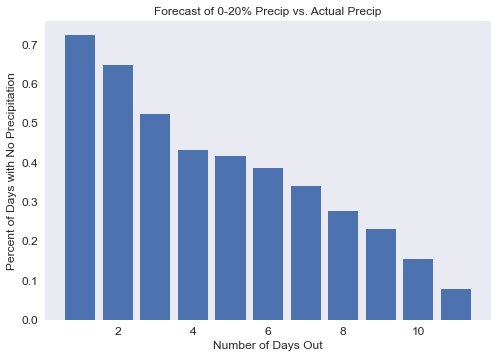

In [120]:
# Plot the % of days when it doesn't rain given the precip proba in the forecast of 0-20%

fig, ax = plt.subplots()

x = list(range(1,12))
y = precip_probas

ax.bar(x, y)
ax.grid(False)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

ax.set_ylabel('Percent of Days with No Precipitation', fontsize=12)
ax.set_xlabel('Number of Days Out', fontsize=12)
ax.set_title('Forecast of 0-20% Precip vs. Actual Precip', fontsize=12);
# ax.legend(['High Temp Diff', 'Low Temp Diff']);